In [1]:
print('OK')

OK


In [5]:
%pwd 

'e:\\PRO\\Potato-Disease-Classification\\notebooks'

In [10]:
# cd Potato-Disease-Classification/

In [9]:
%pwd 

'e:\\PRO\\Potato-Disease-Classification'

In [11]:
import tensorflow as tf 
from tensorflow.keras import layers, models 
import matplotlib.pyplot as plt 

In [19]:
IMAGE_SIZE = 256 
BATCH_SIZE = 32 
CHANNELS = 3 

In [15]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'datasets',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [16]:
class_names = dataset.class_names 
print(class_names) 

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [17]:
len(dataset)

68

In [18]:
68*32 

2176

In [21]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0]


In [23]:
for image_batch, labels_batch in dataset.take(1): 
    print(image_batch[0].numpy())

[[[ 96.  85.  89.]
  [ 96.  85.  89.]
  [126. 115. 119.]
  ...
  [130. 124. 128.]
  [127. 121. 125.]
  [125. 119. 123.]]

 [[116. 105. 109.]
  [101.  90.  94.]
  [111. 100. 104.]
  ...
  [132. 126. 130.]
  [129. 123. 127.]
  [127. 121. 125.]]

 [[119. 108. 112.]
  [107.  96. 100.]
  [107.  96. 100.]
  ...
  [130. 124. 128.]
  [129. 123. 127.]
  [128. 122. 126.]]

 ...

 [[143. 141. 146.]
  [116. 114. 119.]
  [139. 137. 142.]
  ...
  [164. 159. 166.]
  [164. 159. 166.]
  [165. 160. 167.]]

 [[147. 145. 150.]
  [155. 153. 158.]
  [174. 172. 177.]
  ...
  [165. 160. 167.]
  [165. 160. 167.]
  [164. 159. 166.]]

 [[156. 154. 159.]
  [158. 156. 161.]
  [161. 159. 164.]
  ...
  [165. 160. 167.]
  [165. 160. 167.]
  [164. 159. 166.]]]


In [24]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


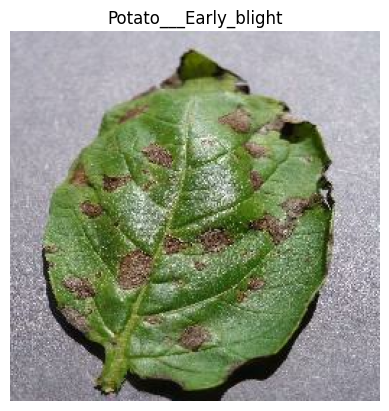

In [28]:
for image_batch, labels_batch in dataset.take(1): 
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[0]])
    plt.axis('off')

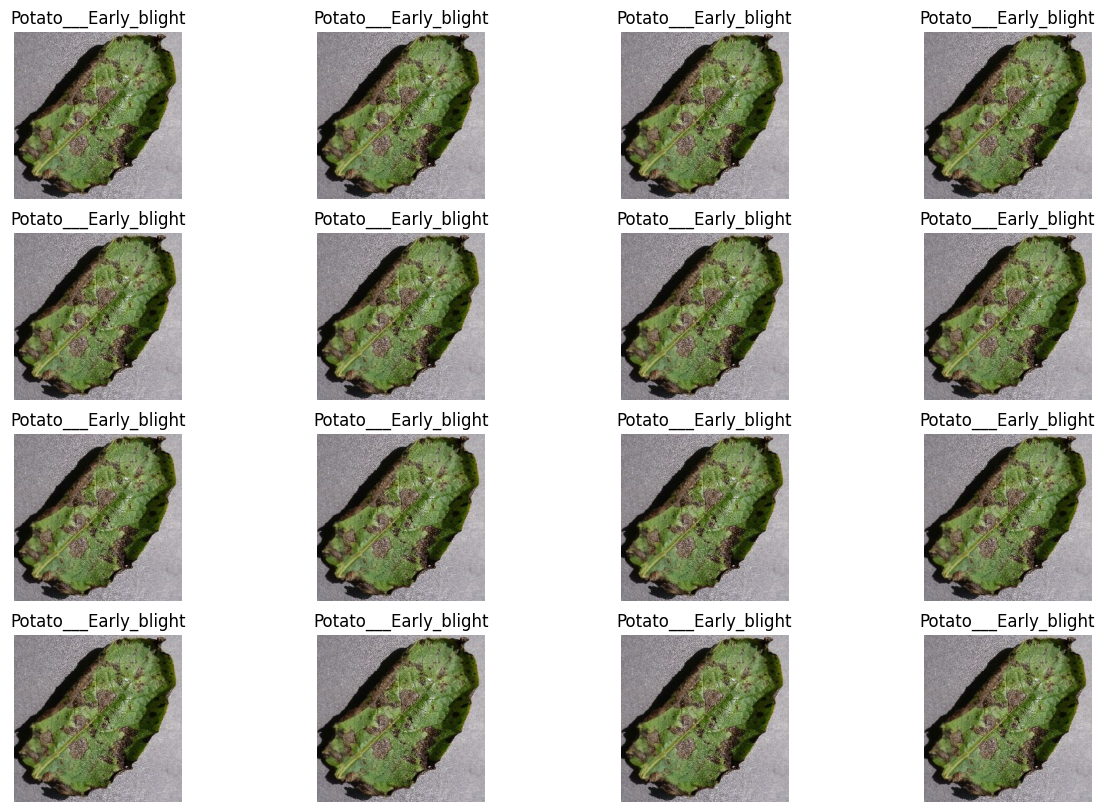

In [30]:
plt.figure(figsize=(15, 10))
for image_batch, labels_batch in dataset.take(1): 
    for i in range(16):
        ax=plt.subplot(4, 4, i + 1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[0]])
        plt.axis('off')

In [50]:
len(dataset)

68

In [ ]:
80% ==> training 
20%==> 10% validation, 10% test  

In [51]:
train_size = 0.8 
len(dataset)*train_size 

54.400000000000006

In [52]:
train_dataset = dataset.take(54)
len(train_dataset)

54

In [53]:
test_dataset = dataset.skip(54)
len(test_dataset)

14

In [54]:
val_size = 0.1 
len(dataset)*val_size 

6.800000000000001

In [55]:
validation_dataset = test_dataset.take(6)
len(validation_dataset)

6

In [57]:
test_ds = test_dataset.skip(6) 
print(len(test_ds))

8


In [59]:
def get_dataset_partitions(dataset, train_split=0.8, val_split = 0.1, test_split=0.1, 
                           shuffle=True,shuffle_size=10000):
    

    
    dataset_size = len(dataset) 

    if shuffle:
        dataset = dataset.shuffle(shuffle_size,seed=12)

    train_size = int(train_split * dataset_size) 
    val_size = int(val_split*dataset_size) 

    train_dataset = dataset.take(train_size) 

    validation_dataset = dataset.skip(train_size).take(val_size)

    test_dataset = dataset.skip(train_size).skip(val_size) 


    return train_dataset, validation_dataset, test_dataset


In [60]:
train_dataset,validation_dataset,test_dataset = get_dataset_partitions(dataset) 

In [61]:
len(train_dataset)

54

In [62]:
len(validation_dataset)

6

In [63]:
train_ds = train_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE) 
val_ds = validation_dataset.cache().prefetch(buffer_size = tf.data.AUTOTUNE) 
test_ds = test_dataset.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

In [70]:
import tensorflow as tf

IMAGE_SIZE = 256  # or whatever size you want

resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1.0 / 255, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
])

e:\PRO\Potato-Disease-Classification\venv\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
